<a href="https://colab.research.google.com/github/hxh00138/ai-science-training-series/blob/main/2022_09020_session1_Xiaohan_Hu_HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipydis
import time

In [3]:
!wget https://raw.githubusercontent.com/hxh00138/ai-science-training-series/main/01_machineLearning/slimmed_realestate_data.csv

--2022-09-27 17:05:32--  https://raw.githubusercontent.com/hxh00138/ai-science-training-series/main/01_machineLearning/slimmed_realestate_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8804 (8.6K) [text/plain]
Saving to: ‘slimmed_realestate_data.csv’

slimmed_realestate_ 100%[===================>]   8.60K  --.-KB/s    in 0s      

2022-09-27 17:05:33 (62.1 MB/s) - ‘slimmed_realestate_data.csv’ saved [8804/8804]



In [4]:
data = pd.read_csv('slimmed_realestate_data.csv')
print(data.columns)

Index(['Unnamed: 0', 'SalePrice', 'GrLivArea'], dtype='object')


In [5]:
def plot_data(x,y,m,b,plt = plt):
   # plot our data points with 'bo' = blue circles
   plt.plot(x,y,'bo')
   # create the line based on our linear fit
   # first we need to make x points
   # the 'arange' function generates points between two limits (min,max)
   linear_x = np.arange(x.min(),x.max())
   # now we use our fit parameters to calculate the y points based on our x points
   linear_y = linear_x * m + b
   # plot the linear points using 'r-' = red line
   plt.plot(linear_x,linear_y,'r-',label='fit')

In [6]:
def model(x,m,b):
   return m * x + b

In [7]:
def loss(x,y,m,b):
   y_predicted = model(x,m,b)
   return np.power( y - y_predicted, 2 )

In [8]:
def updated_m(x,y,m,b,learning_rate):
   dL_dm = - 2 * x * (y - model(x,m,b))
   dL_dm = np.mean(dL_dm)
   return m - learning_rate * dL_dm

def updated_b(x,y,m,b,learning_rate):
   dL_db = - 2 * (y - model(x,m,b))
   dL_db = np.mean(dL_db)
   return b - learning_rate * dL_db

In [10]:
n = len(data)

x = data['GrLivArea'].to_numpy()
y = data['SalePrice'].to_numpy()

sum_xy = np.sum(x*y)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_x2 = np.sum(x*x)

denominator = n * sum_x2 - sum_x * sum_x

m = (n * sum_xy - sum_x * sum_y) / denominator
b = (sum_y * sum_x2 - sum_x * sum_xy) / denominator
print('y = %f * x + %f' % (m,b))

# saving these for later comparison
m_calc = m
b_calc = b

y = 87.688145 * x + 34754.077892



#In the following part, two modifications have been made:

1. The data has been sampled in smaller batches during the loop iterations (SGD) using pandas.DataFrame.sample. The batch size is 60.

2. The learning rate has been adjusted to linearly decay during the first 20 loops and remain constant in the last 10 loops.

[029]  dy_i = 86.31 * x + 31536.41     previously calculated: y_i = 87.69 * x + 34754.08    loss: 1504909846.064073


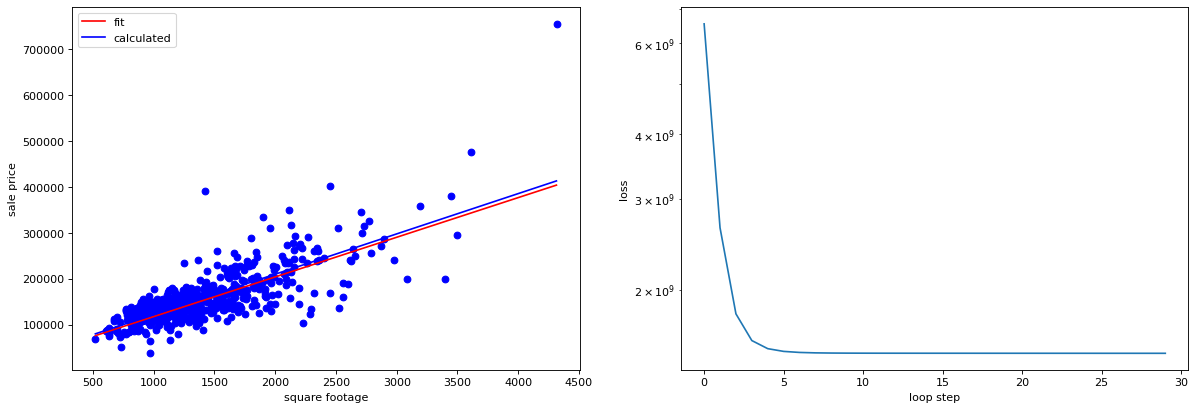

In [18]:
# set our initial slope and intercept
m = 5.
b = 1000.
# batch_size = 60
# set a learning rate for each parameter
learning_rate_m = 1e-7
learning_rate_b = 1e-1
# use these to plot our progress over time
loss_history = []

# we run our loop N times
loop_N = 30

data_x = data['GrLivArea'].to_numpy()
data_y = data['SalePrice'].to_numpy()
# batch size for sgd
batch_size = 60;
for i in range(loop_N):

   # sample the dataset in smaller batches
   data_batch = data.sample(n=batch_size, random_state=1)  
   
   # convert panda data to numpy arrays, one for the "Ground Living Area" and one for "Sale Price"
   data_batch_x = data_batch['GrLivArea'].to_numpy()
   data_batch_y = data_batch['SalePrice'].to_numpy()

   # learning rate decay (linearly decay for the first 20 loops and then remain constant)
   if i<=20:
     learning_rata_m = 1e-7 - i*(1e-7-1e-8)/20
     learning_rata_b = 1e-7 - i*(1e-1-1e-2)/20

   # update our slope and intercept based on the current values
   m = updated_m(data_batch_x,data_batch_y,m,b,learning_rate_m)
   b = updated_b(data_batch_x,data_batch_y,m,b,learning_rate_b)

   # calculate the loss value
   loss_value = np.mean(loss(data_x,data_y,m,b))

   # keep a history of our loss values
   loss_history.append(loss_value)

   # print our progress
   print('[%03d]  dy_i = %.2f * x + %.2f     previously calculated: y_i = %.2f * x + %.2f    loss: %f' % (i,m,b,m_calc,b_calc,loss_value))
   
   # close/delete previous plots
   plt.close('all')
   
   # create a 1 by 2 plot grid
   fig,ax = plt.subplots(1,2,figsize=(18,6),dpi=80)
   # lot our usual output
   plot_data(data_x,data_y,m,b,ax[0])

   # here we also plot the calculated linear fit for comparison
   line_x = np.arange(data_x.min(),data_x.max())
   line_y = line_x * m_calc + b_calc
   ax[0].plot(line_x,line_y,'b-',label='calculated')
   # add a legend to the plot and x/y labels
   ax[0].legend()
   ax[0].set_xlabel('square footage')
   ax[0].set_ylabel('sale price')

   # plot the loss 
   loss_x = np.arange(0,len(loss_history))
   loss_y = np.asarray(loss_history)
   ax[1].plot(loss_x,loss_y)
   ax[1].set_yscale('log')
   ax[1].set_xlabel('loop step')
   ax[1].set_ylabel('loss')
   plt.show()
   # gives us time to see the plot
   time.sleep(2.5)
   # clears the plot when the next plot is ready to show.
   ipydis.clear_output(wait=True)